## 一、实验介绍

### 1.实验内容

&emsp;&emsp;本实验主要学习在Keras中使用ResNet模型进行实时预测。

### 2.实验要点

* 掌握ResNet模型的基本语法。

* 掌握ResNet模型的构建和预测方法。

### 3.实验环境

* jupyter环境

## 二、实验步骤

### **实验步骤：Keras - 使用ResNet模型进行实时预测**

ResNet是一个预训练模型。它是使用ImageNet训练的。在ImageNet上预训练的ResNet模型权重。它具有以下语法：
```
keras.applications.resnet.ResNet50 (
   include_top = True, 
   weights = 'imagenet', 
   input_tensor = None, 
   input_shape = None, 
   pooling = None, 
   classes = 1000
)
```

在这里，

* include_top 指的是网络顶部的全连接层。

* weights是指 ImageNet 上的预训练。

* input_tensor 是指可选的 Keras 张量，用作模型的图像输入。

* input_shape 是指可选的形状元组。 此模型的默认输入大小为 224x224。

* classes是指可选数量的类来对图像进行分类。

让我们通过写一个简单的例子来理解模型:

**第一步：导入模块**

让我们加载必要的模块，如下所示:

In [1]:
import PIL 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.imagenet_utils import decode_predictions 
import matplotlib.pyplot as plt 
import numpy as np 
from keras.applications.resnet50 import ResNet50 
from keras.applications import resnet50

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**第 2 步：选择输入**

让我们选择一个输入图像，Lotus，如下所示:

PIL image size (224, 224)


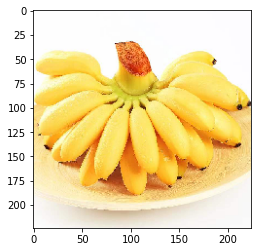

In [2]:
filename = 'banana.jpg' 
## load an image in PIL format 
original = load_img(filename, target_size = (224, 224)) 
print('PIL image size',original.size)
plt.imshow(original) 
plt.show()

在这里，我们加载了一个图像（banana.jpg）并显示它。

**第 3 步：将图像转换为 NumPy 数组**

让我们将输入 Banana 转换为 NumPy 数组，以便可以将其传递到模型中进行预测。

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


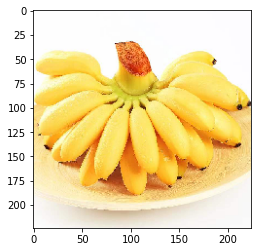

In [3]:
#convert the PIL image to a numpy array 
numpy_image = img_to_array(original) 
plt.imshow(np.uint8(numpy_image)) 

print('numpy array size',numpy_image.shape) 
# Convert the image / images into batch format 
image_batch = np.expand_dims(numpy_image, axis = 0) 

print('image batch size', image_batch.shape)

**第 4 步：模型预测**

让我们将输入输入模型以获得预测:

In [10]:
#prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy()) 

# create resnet model 
resnet_model = resnet50.ResNet50() 
resnet_model.load_weights('model/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

# get the predicted probabilities for each class 
predictions = resnet_model.predict(processed_image) 

# convert the probabilities to class labels 
label = decode_predictions(predictions) 

print(label)

[[('n07753592', 'banana', 0.5557186), ('n07747607', 'orange', 0.18464859), ('n07745940', 'strawberry', 0.12825705), ('n07749582', 'lemon', 0.064012036), ('n07753275', 'pineapple', 0.019184409)]]


## 三、实验任务

&emsp;&emsp;参照实验步骤，创建一个简单的ResNet模型进行实时预测。